# LiMe Tutorial: Fits configuration

All `LiMe` functions can be run directly from a python script in which the user declare.s the input data and the treatment configuration. However, as the number and complexity of the input spectra increases, it becomes convenient to split the fitting configuration in its own file.
In this tutorial, we shall explore how `LiMe` reads the configuration file and how you can personalise your emission line fittings.


Let's start by importing the scientific libraries:

In [9]:
import numpy as np
import lime as lm
from astropy.io import fits

In the [github](https://github.com/Vital-Fernandez/lime) site, where you found this notebook, you may also download a "sample data". As we did in the [first](https://github.com/Vital-Fernandez/lime/blob/master/examples/LiMe%20Tutorial%201%20-%20Basic%20Opertions.ipynb) lets load the Grean Pea galaxy spectrum and its line masks.

In [14]:
# Opening the fits file
ext = 0
with fits.open('./sample_data/gp121903_BR.fits') as hdul:
    flux, header = hdul[ext].data, hdul[ext].header

# Recovering the wavelength range
w_min = header['CRVAL1']
dw = header['CD1_1']
pixels = header['NAXIS1']
w_max = w_min + dw * pixels
wave = np.linspace(w_min, w_max, pixels, endpoint=False)

# Reading the masks table as a pandas dataframe
gp_maskDF = lm.load_lines_log('./sample_data/gp121903_BR_mask.txt')

The configuration files in ``LiMe`` use the [traditional configuration format](https://en.wikipedia.org/wiki/INI_file):

![Configuration file](images/conf_file.png)

To load this text file, we use the `lime.load_cfg` function:

In [15]:
gp_conf = lm.load_cfg('./sample_data/example_configuration_file.cfg')

The output from the ``load_cfg`` function is a dictionary of dictionaries (one for each section in the text file).

In most cases, the section and option names do not have an impact on the algorithm operation.  However, it is recommended to use the default names to take advantage of `LiMe` automations.

The first important section is ``file_information`` which is used to store the sample spectra file information:

In [16]:
gp_conf['file_information']

{'data_folder': '/home/vital/Dropbox/Astrophysics/Papers/gtc_greenpeas/data',
 'results_folder': '/home/vital/Dropbox/Astrophysics/Papers/gtc_greenpeas/treatment',
 'images_folder': '/home/vital/Dropbox/Astrophysics/Papers/gtc_greenpeas/Greenpeas_osiris_manuscript_v0/images',
 'tables_folder': '/home/vital/Dropbox/Astrophysics/Papers/gtc_greenpeas/Greenpeas_osiris_manuscript_v0/tables',
 'files_list': ['gp030321_BR.fits', 'gp101157_BR.fits', 'gp121903_BR.fits'],
 'object_list': ['gp030321', 'gp101157', 'gp121903'],
 'refName_list': ['SHOC148', 'GP101157', 'GP121903']}

Other than that, the section and key names can be freely defined by the user. Indeed, we can store additional data, for example, the redshift values of our sample and the normalization value for the spectra in the ``sample_data`` section:

In [17]:
# Define a spectrum object to from which we measure the emission lines
gp_spec = lm.Spectrum(wave, flux, redshift=gp_conf['sample_data']['z_array'][2], normFlux=gp_conf['sample_data']['norm_flux'])

The second most important section is ``default_line_fitting``

In [8]:
print(gp_conf['default_line_fitting'])

{'O2_3726A_m': 'O2_3726A-O2_3729A', 'H1_3889A_m': 'H1_3889A-He1_3889A', 'Ar4_4711A_m': 'Ar4_4711A-He1_4713A', 'O2_7319A_m': 'O2_7319A-O2_7330A', 'S2_6716A_b': 'S2_6716A-S2_6731A', 'H1_6563A_b': 'H1_6563A-N2_6584A-N2_6548A', 'O1_6300A_b': 'O1_6300A-S3_6312A', 'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'}, 'N2_6548A_kinem': 'N2_6584A'}
{'O2_3726A_m': 'O2_3726A-O2_3729A', 'H1_3889A_m': 'H1_3889A-He1_3889A', 'Ar4_4711A_m': 'Ar4_4711A-He1_4713A', 'O2_7319A_m': 'O2_7319A-O2_7330A', 'S2_6716A_b': 'S2_6716A-S2_6731A', 'H1_6563A_b': 'H1_6563A-N2_6584A-N2_6548A', 'O1_6300A_b': 'O1_6300A-S3_6312A', 'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'}, 'N2_6548A_kinem': 'N2_6584A'}


This section contains the lines, whose fitting is more complex than a single gaussian.

The lines label is based on the style used by the library [PyNeb](http://research.iac.es/proyecto/PyNeb//):

![Configuration file](images/notation_format.png)

Optional subscripts in the line labels provide additional information for the line line fitting:
* **_m**: This lines represents a "Merged" emission. This means that the observed flux comes from several transitions but the individual components cannot be isolated in the observed spectrum. This is usually the case of the [OII]3726,3729Å doublet in the optical range.
* **_b** This line represents a "Blended" emission. This means that the observed flux comes from several transitions and the individual components can be splited in several Gaussian components. This is usually the case of the Hα-[NII]6548,6584Å group in the optical range

In both cases, though, the lines must be defined with dashes ``(-)`` separating each component:

``O2_3726A_m=O2_3726A-O2_3729A``

``H1_6563A_b=H1_6563A-N2_6584A-N2_6548A``

In the first case fitting, the "merged" ``O2_3726A_m`` line, we have:


Line label: O2_3726A_m
- Line regions: w1    3665.75
w2    3694.26
w3    3716.02
w4    3743.70
w5    3754.88
w6    3767.50
Name: O2_3726A_m, dtype: float64
- Normalization flux: 1e-14
- Redshift: 0.19531
- Peak wavelength: 4456.27; peak intensity: 0.07
- Cont. slope: -7.40e-06; Cont. intercept: 4.01e-02

- O2_3726A_m Intg flux: 0.572 +/- 0.002
- O2_3726A_m Eqw (intg): 80.96 +/- 0.45

- O2_3726A_m gaussian fitting:
-- Gauss flux: 0.564 +/- 0.004
-- Center: 4456.10 +/- 0.02
-- Sigma (km/s): 226.76 +/- 1.67



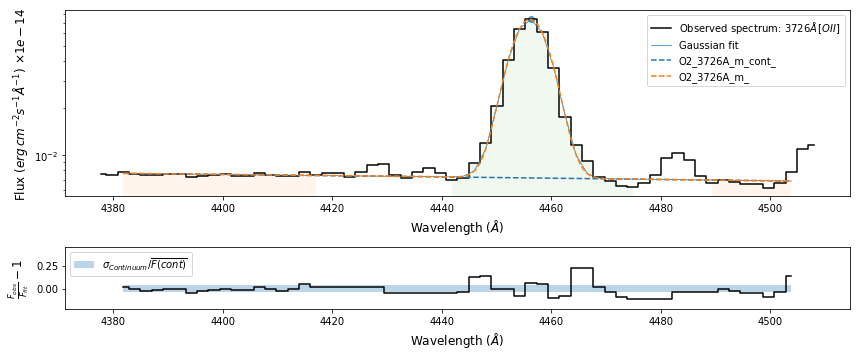

In [18]:
gp_spec.fit_from_wavelengths('O2_3726A_m', line_wavelengths=gp_maskDF.loc['O2_3726A_m'], user_cfg={'O2_3726A_m': 'O2_3726A-O2_3729A'})
gp_spec.display_results(show_plot=True)

Even though we provided two components, the fit only consists in a single Gaussian because we used the **_b** suffix. However, the line is stored as a having two components:

In [21]:
print(gp_spec.linesDF.loc['O2_3726A_m', 'blended_label'])
print(gp_spec.linesDF.loc['O2_3726A_m', 'latexLabel'])

O2_3726A-O2_3729A
$3726\AA\,[OII]+3729\AA\,[OII]$


This distinction can be important in a posterior chemical analysis.

The ``fit_from_wavelengths`` user configuration dictionary can include the data from all the spectrum lines. However, it will only use the data describing the current line. For example, in the case of the Hα-[NII]6548,6584Å group:


Line label: H1_6563A_b
- Line regions: w1    6438.03
w2    6508.66
w3    6535.10
w4    6600.95
w5    6627.70
w6    6661.82
Name: H1_6563A_b, dtype: float64
- Normalization flux: 1e-14
- Redshift: 0.19531
- Peak wavelength: 7845.85; peak intensity: 0.23
- Cont. slope: -6.02e-07; Cont. intercept: 6.72e-03

- H1_6563A_b Intg flux: 3.129 +/- 0.001

- H1_6563A gaussian fitting:
-- Gauss flux: 2.916 +/- 0.012
-- Center: 7845.78 +/- 0.02
-- Sigma (km/s): 189.09 +/- 0.84

- N2_6584A gaussian fitting:
-- Gauss flux: 0.144 +/- 0.014
-- Center: 7869.44 +/- 0.60
-- Sigma (km/s): 252.38 +/- 25.94

- N2_6548A gaussian fitting:
-- Gauss flux: 0.049 +/- 0.000
-- Center: 7826.41 +/- 0.60
-- Sigma (km/s): 252.38 +/- 25.94



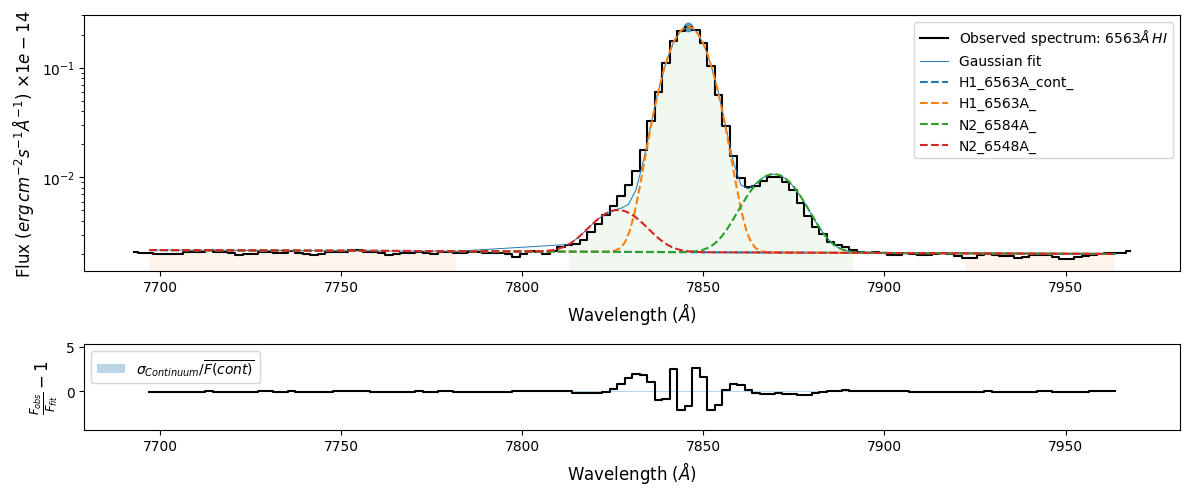

In [22]:
gp_spec.fit_from_wavelengths('H1_6563A_b', line_wavelengths=gp_maskDF.loc['H1_6563A_b'], user_cfg=gp_conf['default_line_fitting'])
gp_spec.display_results(show_plot=True)

In this caAse, the output is a multi-Gaussian profile because 1) We used the **_b** suffix in the line label and 2) ``H1_6563A_b`` is defined as having three components in the configuration file:

``H1_6563A_b = H1_6563A-N2_6584A-N2_6548A``

In the configuration file, we can find an addional configurations for the lines involved in this group:

The first line is imposing a condition on one of the parameters of the gaussian line:
* **_amp** Amplitude: the height of the Gaussian from the continuum in the spectrum flux (normalised) units.
* **_center** Center: the wavelength of the Gaussian peak in the spectrum wavelength units.
* **_sigma** Sigma: the width of the Gaussian curve in the wavelength units.
* **_cont_slope** Continuum slope: the gradient of the zero level for the Gaussian curve in the spectrum flux (normalised) by wavelength units. Only one continuum is considered in multi-Gaussian profiles with the root of the line label.
* **_cont_intercept** Continuum incercept: the linear flux at zero wavelength in normalised units. Only one continuum is considered in multi-Gaussian profiles with the root of the line label.

Each of these parameters can be adjusted in the fitting using the keywords from the [LmFit parameters](https://lmfit.github.io/lmfit-py/parameters.html) library:
* value : Initial value for the parameter
* vary : Whether the Parameter is varied during a fit (default is True)
* min : Lower bound for value (default is -numpy.inf, no lower bound).
* max : Upper bound for value (default is numpy.inf, no upper bound)
* expr : Mathematical expression used to constrain the value during the fit (default is None)